# **HR: what’s likely to make the employee leave the company?**

## **1. Imports**

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

#Data exploration and analysis packages
import numpy as np
import pandas as pd

#Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression modules
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.** 

<sub>The original dataset can be found [here](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv)</sub>

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("./data/HR_capstone_dataset.csv")
# Display first five rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## **2. Data Exploration (Initial EDA and data cleaning)**

- Understand the variables
- Clean the dataset (missing data, redundant data, outliers)

### Basic information

In [3]:
# Basic information about the dataset
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Descriptive statistics

In [4]:
# Descriptive statistics
# Numerical variables
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
#Non numerical variables descriptive statistics
df0[['Department','salary']].describe()

,Department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


### Rename columns

The dataset doesn't have an homogeneous criteria for naming columns. In this step, column's names are standardized, so they are all in `snake_case`. Also the misspelings are corrected and the long names are made more concise.

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df0 = df0.rename(str.lower, axis=1)
df0 = df0.rename(columns = {'number_project':'projects',
                            'average_montly_hours': 'average_monthly_hours',
                            'time_spend_company':'tenure',
                            'promotion_last_5years': 'promotion_last_5_years'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')

### Check for missing values

In [8]:
# Check for missing values
df0.isna().sum()

satisfaction_level        0
last_evaluation           0
projects                  0
average_monthly_hours     0
tenure                    0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
dtype: int64

### Check for duplicates

In [9]:
# Check duplicates
df0.duplicated().sum()


3008

#### Inspection of duplicated data

In [10]:
# Inspect some rows containing duplicates as needed
# dfx receives the duplicates of df0
# dfx data is grouped by the rows that have the same data values
# The indexes produced by the lambda function are asignated to a new list (list of lists of indexes)
dfx = df0[df0.duplicated(keep=False)]
dfx = dfx.groupby(dfx.columns.tolist()).apply(lambda x: x.index.tolist()).values.tolist()
dfx[:15]

[[30, 12030, 14241],
 [71, 12071, 14282],
 [652, 12652, 14863],
 [278, 12278, 14489],
 [477, 12477, 14688],
 [397, 12397, 14608],
 [528, 12528, 14739],
 [195, 12195, 14406],
 [350, 12350, 14561],
 [190, 12190, 14401],
 [1955, 14991],
 [193, 12193, 14404],
 [128, 12128, 14339],
 [688, 12688],
 [94, 12094, 14305]]

In [11]:
# The duplicated columns are accesed by their index from dfx
df0.loc[dfx[0]]

,satisfaction_level,last_evaluation,projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low


In [12]:
df0.loc[dfx[1]]

,satisfaction_level,last_evaluation,projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium


In [13]:
df0.loc[dfx[2]]

,satisfaction_level,last_evaluation,projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary
652,0.09,0.77,6,290,4,0,1,0,technical,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
14863,0.09,0.77,6,290,4,0,1,0,technical,medium


The analysis of these rows demonstrates that they are, in effect, duplicated values. The solution, in this case, is to drop duplicated columns

### Drop duplicated data

In [14]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### New shape of the dataframe

In [15]:
df1.shape

(11991, 10)

### Check for outliers

Figure 1 - Outliers in tenure variable


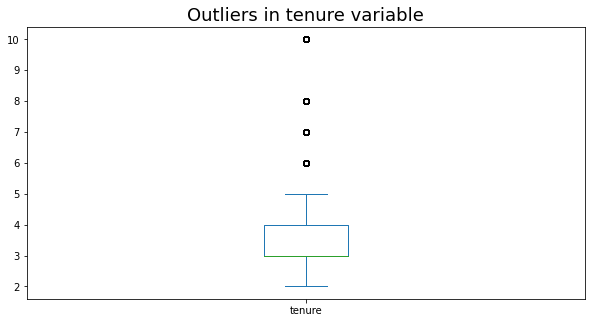

In [16]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
print("Figure 1 - Outliers in tenure variable")
plt.figure(figsize=(10,5))
df1['tenure'].plot.box()
plt.title('Outliers in tenure variable', fontsize=18)
plt.show()

Figure 2 - Outliers in tenure with seaborn


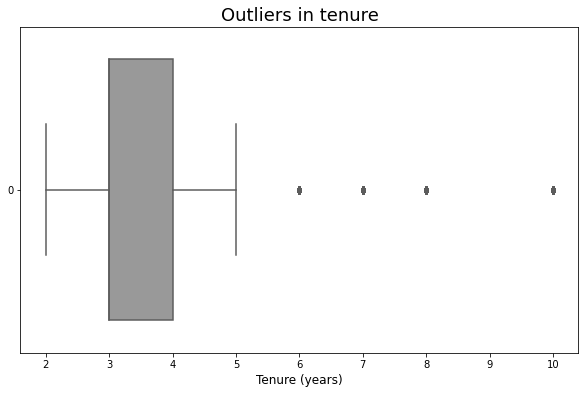

In [17]:
# The same boxplot using seaborn
print("Figure 2 - Outliers in tenure with seaborn")
plt.figure(figsize=(10,6))
sns.boxplot(data=df1['tenure'], orient='h', color=".6")
plt.title("Outliers in tenure", fontsize=18)
plt.xlabel('Tenure (years)', fontsize=12)
plt.show()

In [18]:
# Determine the number of rows containing outliers
q1 = df1['tenure'].quantile(0.25)
q3 = df1['tenure'].quantile(0.75)
IQR = q3 - q1
outliers_list = df1['tenure'][((df1['tenure'] < (q1-1.5*IQR)) | (df1['tenure'] > (q3 + 1.5*IQR)))]
print('Outliers limits by IQR')
print('----------------------')
print('Variable name: ', df1['tenure'].name,'\n')
print("Lower limit: ", q1 - 1.5*IQR)
print("Upper limit: ", q3 + 1.5*IQR)
print("# of outliers: ", outliers_list.shape[0])

Outliers limits by IQR
----------------------
Variable name:  tenure 

Lower limit:  1.5
Upper limit:  5.5
# of outliers:  824


The need to adopt some action with the outliers will be analyzed in the instance of constructing the model required by the specifications. Some models are more sensitive to outlires, and if such's the case, propper solution will be applied.

### Descriptive statistics after data cleaning

In [19]:
#Descriptive statistics after first cleaning and analysis
df1.describe()

,satisfaction_level,last_evaluation,projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## **3. Data Exploration (Continue EDA)**

## Count and proportions of employees that left the company

In [20]:
# Get numbers of people who left vs. stayed
count_dict = {'Situation': ['left', 'stayed'],
              'Count': [df1['left'].value_counts()[1],
                        df1['left'].value_counts()[0]],
              'Percentage': [df1['left'].value_counts(normalize=True)[1]*100,
                        df1['left'].value_counts(normalize=True)[0]*100]}
count_df = pd.DataFrame(count_dict)
count_df

,Situation,Count,Percentage
0,left,1991,16.60412
1,stayed,10000,83.39588


Figure 3 - Proportion of left vs. stayed workers


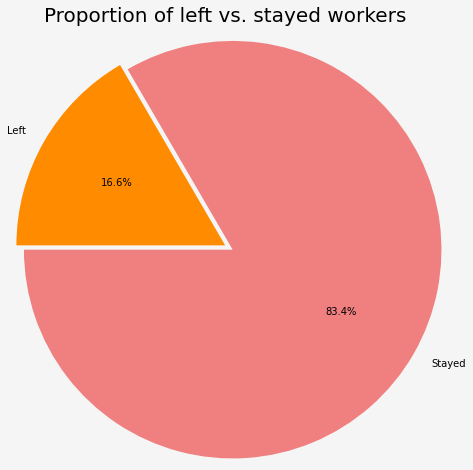

In [21]:
print("Figure 3 - Proportion of left vs. stayed workers")
plt.figure(figsize=(8,8), facecolor="whitesmoke")
plt.pie(x=df1['left'].value_counts(), autopct="%1.1f%%", labels=['Stayed','Left'], startangle=180,
        radius=1.2, explode=[0.05,0], colors=['lightcoral', 'darkorange'])
plt.title("Proportion of left vs. stayed workers", fontsize=20)
plt.show()

## Data visualizations

The next steps of the exploratory data analysis is done by plotting the different variables of the dataset. In some cases, the visualizations are complemented with further analysis.

### Variables distributrions

- The initial set of visualizations is intended to illustrate the distributional characteristics of each variable in the dataset, offering a preliminary understanding of their respective distributions, proportions, and compositions.
- For this task, I started by setting una matplotlib figure (`fig` variable) that contains all the plots (`axs` variable), by setting a [pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function
- Inside that wrapper, each visualization is created according to the nature of the data contained in the features.
- The plots are create using seaborn [histplots](https://seaborn.pydata.org/generated/seaborn.histplot.html) and a [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) in the case of the "department" column, because it's better visualized with a decreasing order of its categories.

Figure 4 - Satisfaction level count


Text(0.5, 1.0, 'Satisfaction level count')

<Figure size 864x432 with 0 Axes>

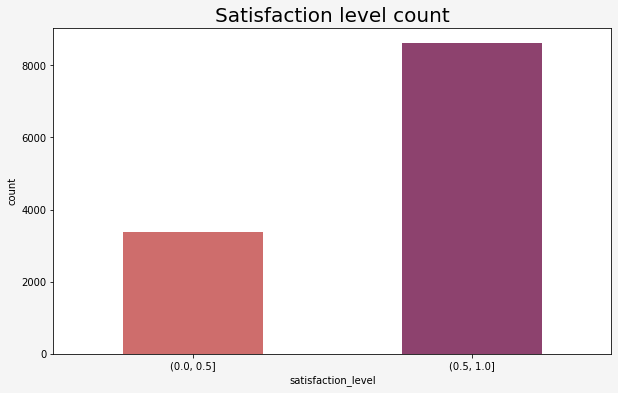

In [22]:
#Satisfied vs. insatisfied employees
print("Figure 4 - Satisfaction level count")
plt.figure(figsize=(12,6), facecolor="whitesmoke")
cutted = pd.cut(df1['satisfaction_level'], [0, 0.5,1])
plt.figure(figsize=(10,6), facecolor="whitesmoke")
sns.countplot(x=cutted, width=0.5, palette='flare')
plt.title('Satisfaction level count', fontsize=20)

The following dataframe shows the exact number and proportions of the satisfaction level of the employees

In [23]:
cutted_dict = {"satisfaction_level": ['low', 'high'],
               'count': [df1[df1['satisfaction_level']<= 0.5]['satisfaction_level'].count(),
                         df1[df1['satisfaction_level']> 0.5]['satisfaction_level'].count()],
               'percentage': [(df1[df1['satisfaction_level']<= 0.5]['satisfaction_level'].count() /
                              df1.shape[0]) * 100,
                              (df1[df1['satisfaction_level']> 0.5]['satisfaction_level'].count() /
                              df1.shape[0]) * 100]}
cutted_df = pd.DataFrame(cutted_dict)
cutted_df

,satisfaction_level,count,percentage
0,low,3384,28.221166
1,high,8607,71.778834


In [24]:
"""Function: general_viz
    Returns a pyplot.subplots with all the numerical features distributions
    Arguments:
    1. data: dataframe to be plotted
    2. continuos: list. Continuous variables
    3. discrete: list. Discrete variables
    4. binomial: list. Binomial variables
    5. ax: variable created in the subplots

    Out: a subplots with the histograms of all the variables from the dataframe 
"""
def general_viz(data, continuous, discrete, binomial, ax):
    # Plots (continuous variables)
    for i, col in enumerate(continuous):
        sns.histplot(data[col], shrink=0.8, color="indianred", ax=ax[0, i])
        ax[0,i].set_xlabel(col, fontsize=16)
    
    # Plots (discrete variables)
    for i, col in enumerate(discrete):
        sns.histplot(data[col], binwidth=1, color="indianred", discrete=True, shrink=0.8, ax=ax[1, i])
        ax[1,i].set_xlabel(col, fontsize=16)
    
    # Plots (binomial variables)
    for i, col in enumerate(binomial):
        sns.histplot(data[col], discrete=True, color="indianred", shrink=0.7, ax=ax[2, i])
        ax[2,i].set_xlabel(col, fontsize=16)
        ax[2, i].set_xticks([0, 1])

Figure 5 - Features Distribution


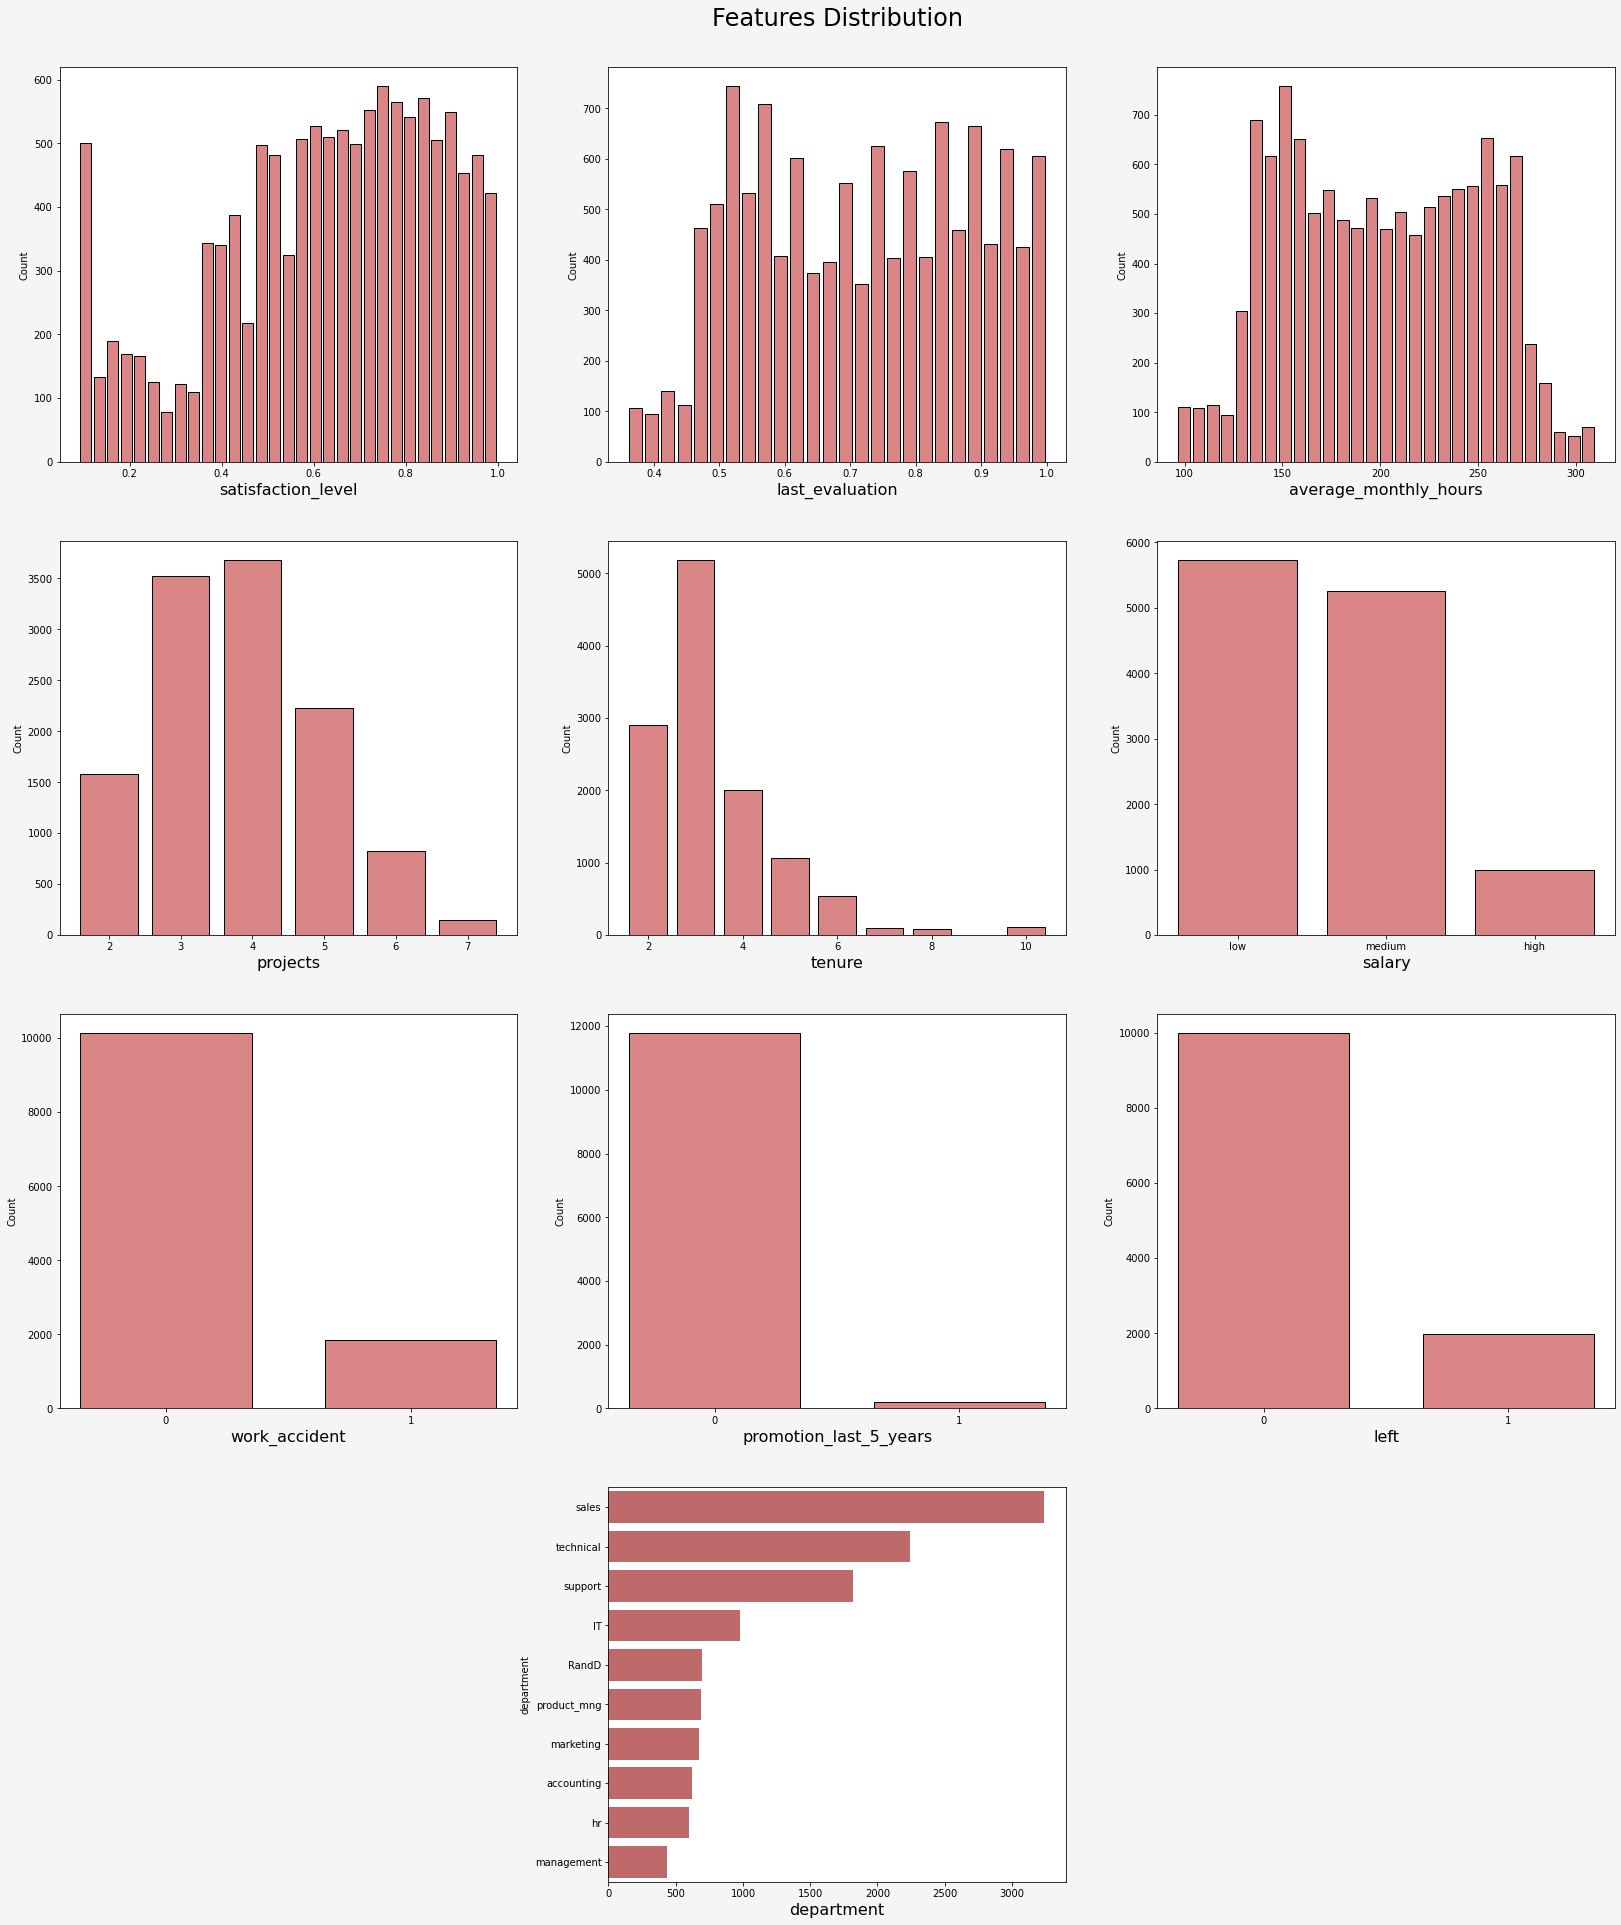

In [25]:
# Define columns for different data types
continuous = ['satisfaction_level', 'last_evaluation', 'average_monthly_hours']
discrete = ['projects', 'tenure', 'salary']
binomial = ['work_accident', 'promotion_last_5_years', 'left']

print("Figure 5 - Features Distribution")

fig, axs = plt.subplots(4, 3, figsize=(24, 28), facecolor='whitesmoke')
plt.subplots_adjust(top=0.95, left=0.05, right=0.95, bottom=0.05)

general_viz(df1, continuous, discrete, binomial, axs)

# Plot department
category_counts = df1['department'].value_counts()
ordered_categories = category_counts.index
sns.countplot(data=df1, y='department', order=ordered_categories,
             color="indianred", ax=axs[3, 1])
axs[3,1].set_xlabel('department', fontsize=16)
axs[3,0].axis('off')
axs[3,2].axis('off')
# Add a common title
fig.suptitle("Features Distribution", fontsize=24)

plt.show()

#### **Correlation heatmap**

- The next plot is a correlation [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap) from seaborn. 
- This kind of visualization is useful to know how the different variables correlates with each other, as a first step to look into posible associations between the different components of the dataset

Figure 6 - Correlation Heatmap


Text(0.5, 1.0, 'Correlation Heatmap')

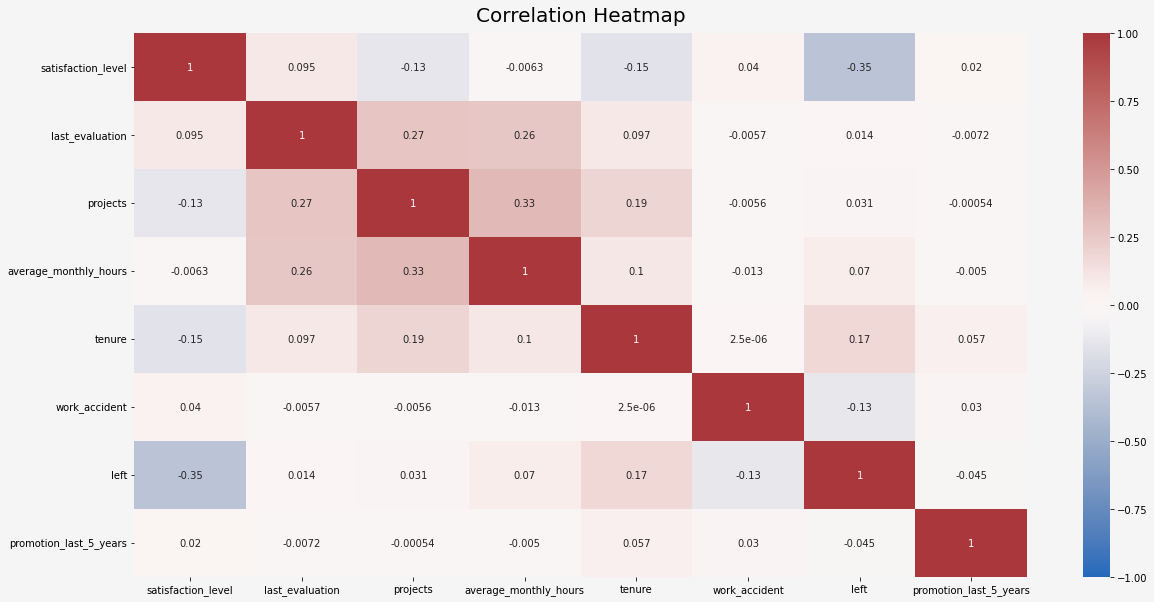

In [ ]:
### Heatmap
print("Figure 6 - Correlation Heatmap")
columns_to_plot = df1.columns.to_list()[:-2]
plt.figure(figsize=(20, 10), facecolor='whitesmoke')
heatmap = sns.heatmap(df1[columns_to_plot].corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontsize=20, pad=12)

##### **Some conclusions**
- There is no strong correlation between the different variables of the dataset
- The stronger correlation for the target variable *"left"* is with the *"satisfaction_level"* variable.
    - It's a negative correlation of -0.35, which means that the less satisfaction level of an emploee, the greater the chance he could leave the company
- Always with the target variable in mind, the next correlation that appears in importance, is with the *"tenure"* variable.
    - In this case, it's a positive correlatino of 0.17
- The next value is the correlation of the target with the *"work_accident"*, a negative one of -0.13. This is indeed a expected relation.
- Next steps will consist in analize this three variables: *"satisfaction_level"*, *"tenure"* and *"work_accident"*, to discover more deeply how they are related to the target, and with other ascpects of the workers data contained in our dataset

## Analysis of *satisfaction_level*

- The intuition previous to the analysis indicates that when an employee is less satisfied, he could be prone to leave the company
- This is confirmed, at least in this stage, with the results of the correlation heatmap, that found a negativa correlation between this variable and the target (-0.35)
- The first graphics separates the employees between those who left and those who stayed, then explore with an histogram the distribution of their satisfaction level

Figure 7 - Departures by satisfaction levels


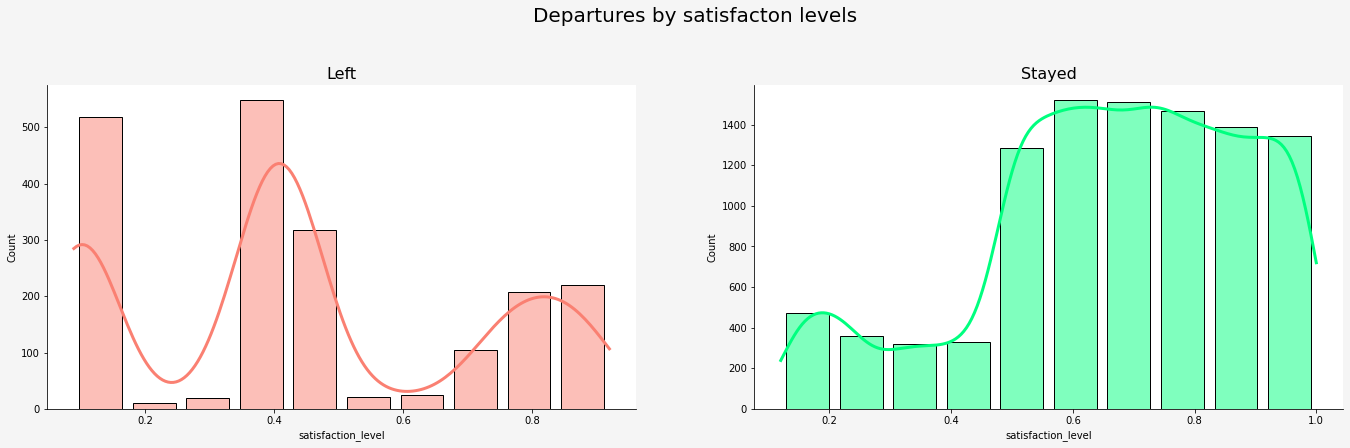

In [27]:
# Relation between satisfaction level and left
print("Figure 7 - Departures by satisfaction levels")
fig, ax = plt.subplots(1,2, figsize=(20,6), facecolor='whitesmoke')
plt.subplots_adjust(top=0.8, left=0.05, right=0.95, bottom=0.05)

sns.despine(top=True, right=True, left=False, bottom=False)
sns.histplot(data=df1.loc[df1['left']==1], x='satisfaction_level', shrink=0.8, color='salmon',
             stat='count', bins=10, kde=True,  line_kws={'linewidth': '3'}, ax=ax[0])
ax[0].set_title('Left', fontsize=16)
sns.histplot(data=df1.loc[df1['left'] == 0], x='satisfaction_level', shrink=0.8, color='springgreen',
             line_kws={'linewidth': '3'},
             stat='count', bins=10, kde=True, ax=ax[1])
ax[1].set_title('Stayed', fontsize=16)
plt.suptitle('Departures by satisfacton levels', fontsize=20)
plt.show()

- The visualization parcially satisfy what could be expected: those less satisfied tends to leave more than those whose satisfaction is greater.
- But some odd information appears: in the *left* graphic, a departure of employees with 0.7 or more points of satisfaction arise, about 500 cases (eyballing the graphic)
- Further analysis is made with this group

Figure 8 - Departures by satisfaction level


Text(0.5, 1.0, 'Departures by satisfaction level')

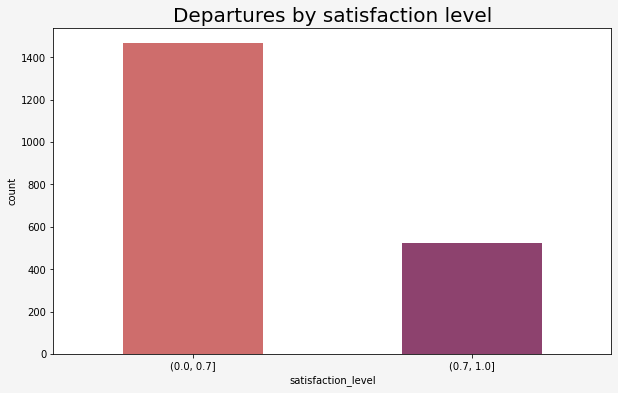

In [28]:
lefties = df1.loc[df1['left'] == 1]
cutted = pd.cut(lefties['satisfaction_level'], [0, 0.7,1])
print("Figure 8 - Departures by satisfaction level")
plt.figure(figsize=(10,6), facecolor="whitesmoke")
sns.countplot(x=cutted, width=0.5, palette='flare')
plt.title('Departures by satisfaction level', fontsize=20)

In [29]:
lefties.describe()

,satisfaction_level,last_evaluation,projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.0,1991.000000
mean,0.440271,0.721783,3.883476,208.162230,3.881467,0.052737,1.0,0.004018
std,0.265207,0.197436,1.817139,61.295145,0.974041,0.223565,0.0,0.063277
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.110000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,226.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.910000,6.000000,262.500000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


- Visually, about a third of the people who left reported what could be understood as a high satisfaction level
- Following, the exact numbers

In [30]:
#Calculating how many employees reported a high level
#of satisfaction and left the company

total_left = lefties.shape[0]
satif_left_nr = lefties[lefties['satisfaction_level'] >= 0.7]['satisfaction_level'].count()
pct_sat_left = (satif_left_nr / total_left) * 100

print('Total number of departures: %i' % total_left)
print('High satisfactied (> 0.7) who left: %i' % satif_left_nr)
print('Proportion of high satisfafied who left: {:.2f}%'.format(pct_sat_left))

Total number of departures: 1991
High satisfactied (> 0.7) who left: 530
Proportion of high satisfafied who left: 26.62%


#### **Workers with satisfaction_level > 0.7**

- These results drives to the convenience of give another step into the analysis of the reasons that guides the departure of employees whom declared satisfied with their jobs

- The next step in this line will be to reformulate a general visualization of the distribution of the variables related to satisfaction_level > 0.7

Figure 9


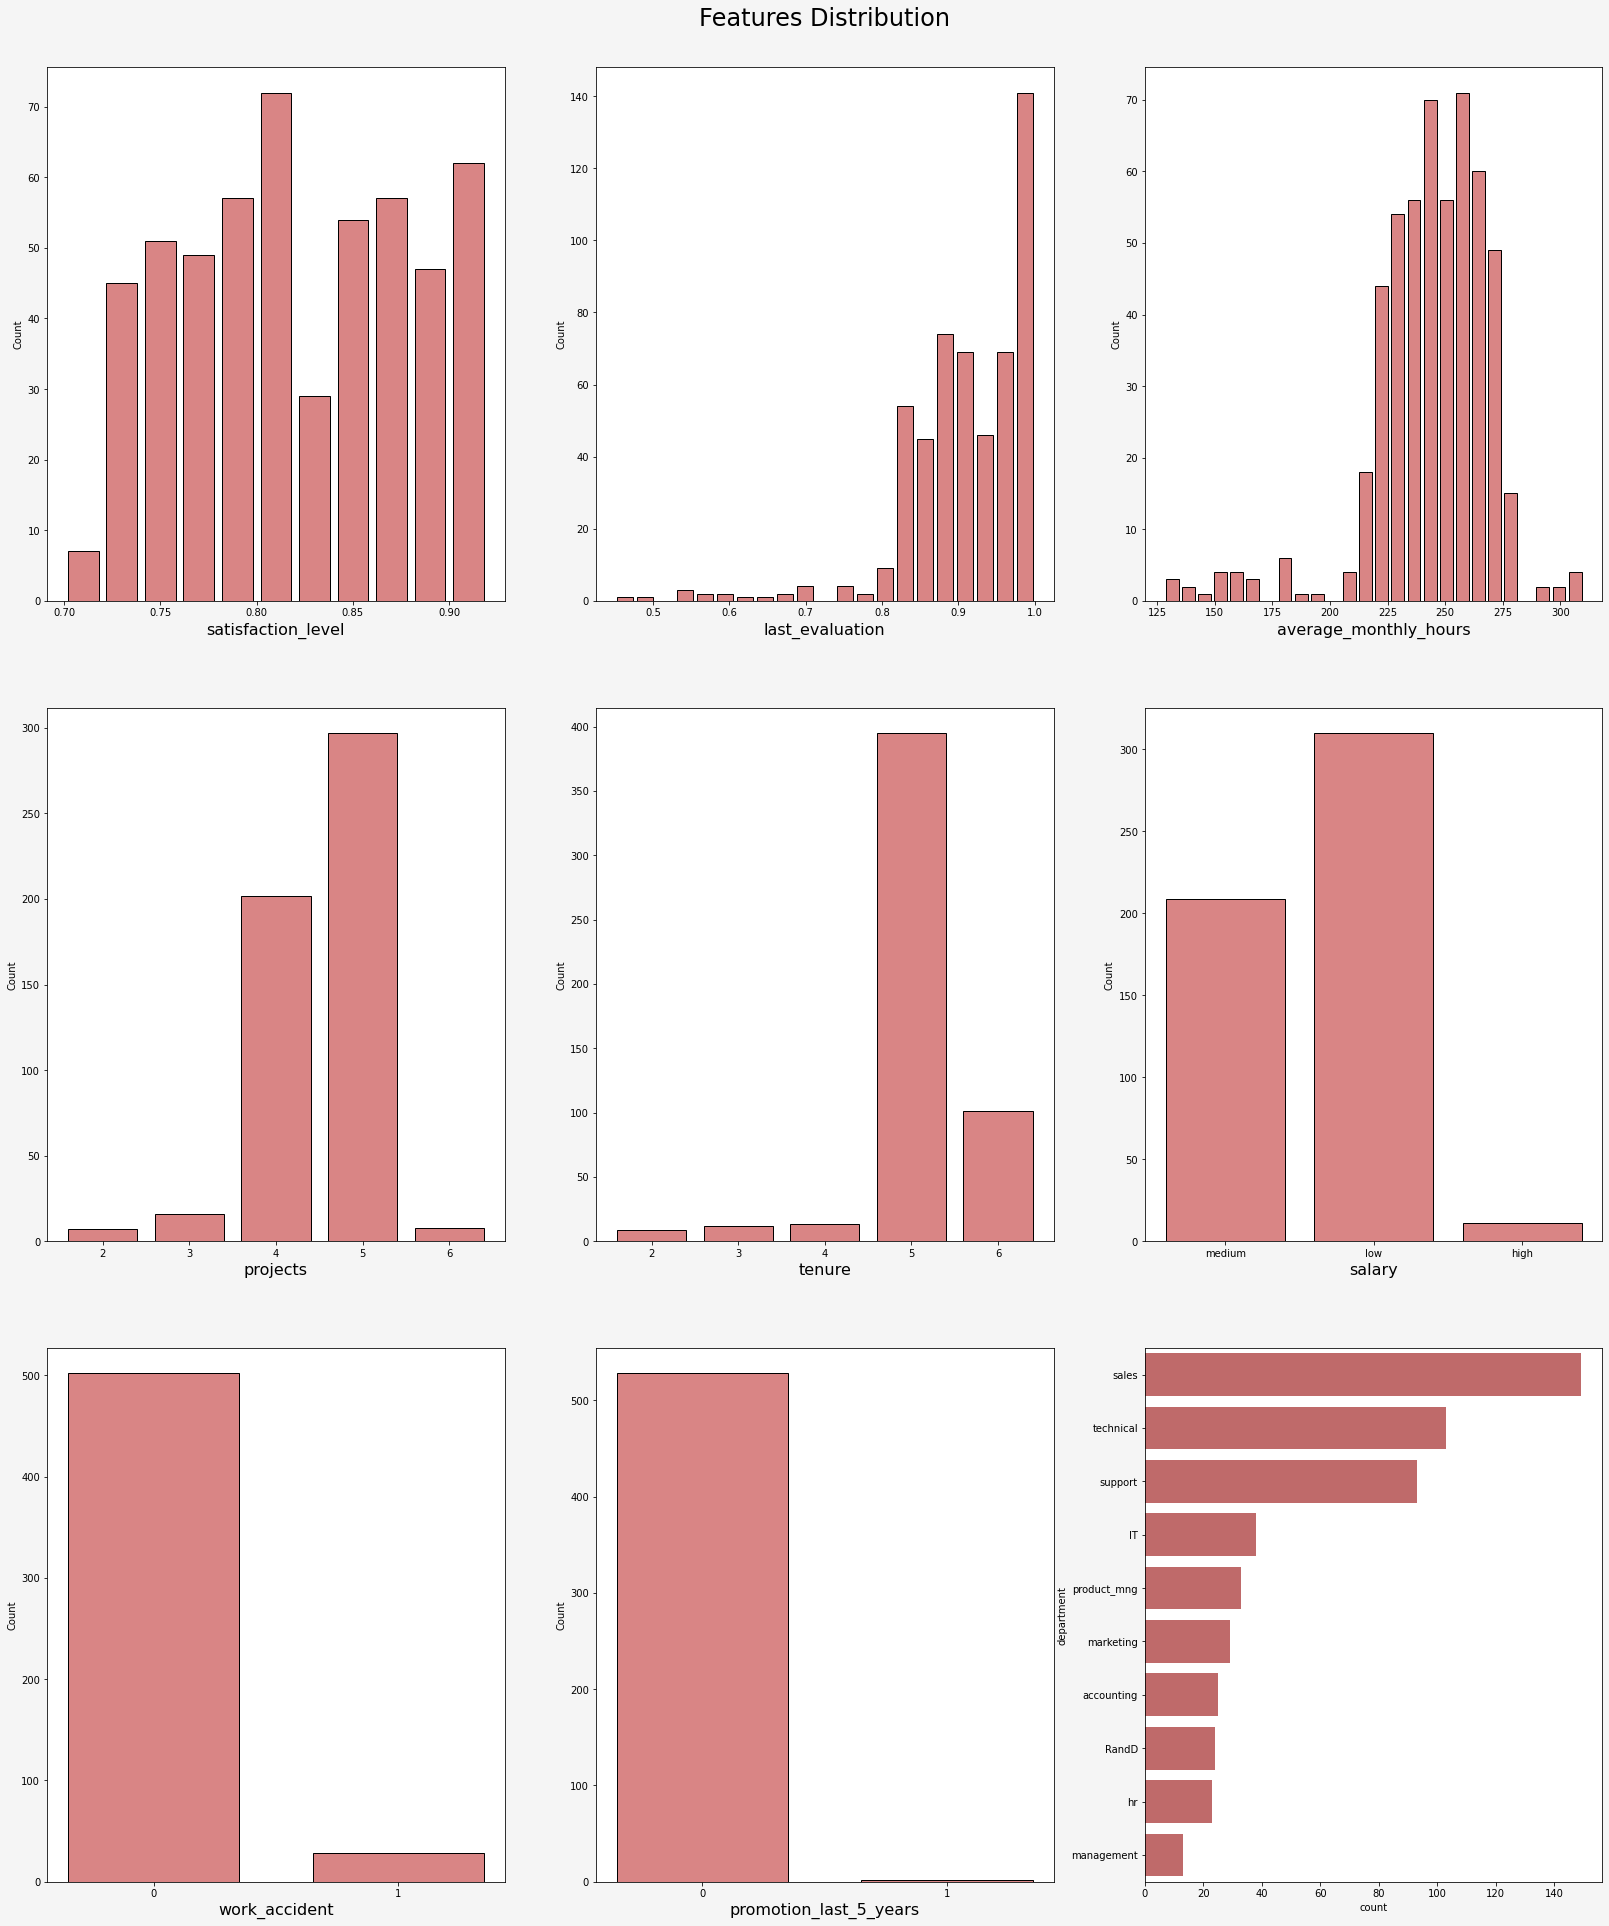

In [31]:
satif_left = lefties.loc[lefties['satisfaction_level'] >= 0.7]


# Adequates the binomial list, letting out 'left' column
binomial = binomial[:-1]

fig, axs = plt.subplots(3, 3, figsize=(24, 28), facecolor='whitesmoke')
plt.subplots_adjust(top=0.95, left=0.05, right=0.95, bottom=0.05)

general_viz(satif_left, continuous, discrete, binomial, axs)

# Plot department
print("Figure 9")
category_counts = satif_left['department'].value_counts()
ordered_categories = category_counts.index
sns.countplot(data=satif_left, y='department', order=ordered_categories,
             color="indianred", ax=axs[2, 2])
# Add a common title
fig.suptitle("Features Distribution", fontsize=24)

plt.show()

- The following cells establishes the exact number for some of the insights that emerge from the previous visualizations

In [32]:
# Descriptive statistics for the satisfaction_level > 0.7
satif_left.describe()

,satisfaction_level,last_evaluation,projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.0,530.000000
mean,0.817245,0.910962,4.533962,243.530189,5.069811,0.052830,1.0,0.003774
std,0.059258,0.083274,0.647649,25.844307,0.674147,0.223906,0.0,0.061371
min,0.700000,0.450000,2.000000,128.000000,2.000000,0.000000,1.0,0.000000
25%,0.770000,0.870000,4.000000,231.250000,5.000000,0.000000,1.0,0.000000
50%,0.820000,0.920000,5.000000,246.000000,5.000000,0.000000,1.0,0.000000
75%,0.870000,0.980000,5.000000,260.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,6.000000,310.000000,6.000000,1.000000,1.0,1.000000


In [33]:
#Descriptive statistics for the entire dataset
df1.describe()

,satisfaction_level,last_evaluation,projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [34]:
#satisfaction_level > 0.7 that works on 5 projects
print("Number of satisfied workers that participates in five projects: ", 
satif_left[satif_left['projects']==5]['projects'].count())

Number of satisfied workers that participates in five projects:  297


In [35]:
#Tenure of 5 and 6 years for satisfaction_level > 0.7
five_yrs =satif_left[satif_left['tenure']==5]['tenure'].count()
six_yrs = satif_left[satif_left['tenure']==6]['tenure'].count()
suma = five_yrs + six_yrs
pct_satis = (suma / satif_left_nr)*100
pct_total = (suma / total_left)*100

print("5yeers: ", five_yrs)
print("6years: ", six_yrs)
print("pct over satisfied who left: {:.2f}%".format(pct_satis))
print("pct over total left: {:.2f}".format(pct_total))

5yeers:  395
6years:  101
pct over satisfied who left: 93.58%
pct over total left: 24.91


#### **Some Conclusions**

The staff who left, despite manifesting high levels of satisfaction, present some characteristics that warrant a review by the company:
1. All of them received performance ratings of 0.5 or higher, with a significant portion receiving 0.8 or higher. This indicates that they were all medium to high-performing employees.
2. On average, they worked more hours than the rest of the staff. The average monthly hours for all employees is approximately 200, while these employees averaged around 243 monthly hours.
3. Similarly, they were involved in more projects. The average number of projects for all employees is 3.8 (standard deviation: 1.16), while these employees averaged 4.5 (standard deviation: 0.6). Over half of these satisfied departed employees were involved in five projects (297 employees).
4. Regarding tenure, the average tenure for all company staff is 3.36 years, but for this group, it's 5.06 years. Most of these employees had five or six years of tenure in the company (5 years: 395; 6 years: 101). They represent 95.58% of this group and 24.91% of the total departing employees.
5. Only an average of 0.37% of the employees in this analysis received a promotion in the last five years, compared to the company-wide average of 1.69%.

Some questions arise from these results:

- Are we dealing with employees who have reached a plateau in their career development within the company?
- How are these employees distributed across the company's hierarchy?
- Where do these employees go after leaving the company?
- What incentives do they receive in their new roles outside the company?

#### **Less satisfied workers**

Now we turn our analysis to the workers that left and manifested medium to low levels of satisfaction (less than 0.7 satisfaction level).
The analysis will conver the same visualizations trying to discover some insights and patterns in the data

- Visualization of the distribution of the different variables for these workers

Figure 10


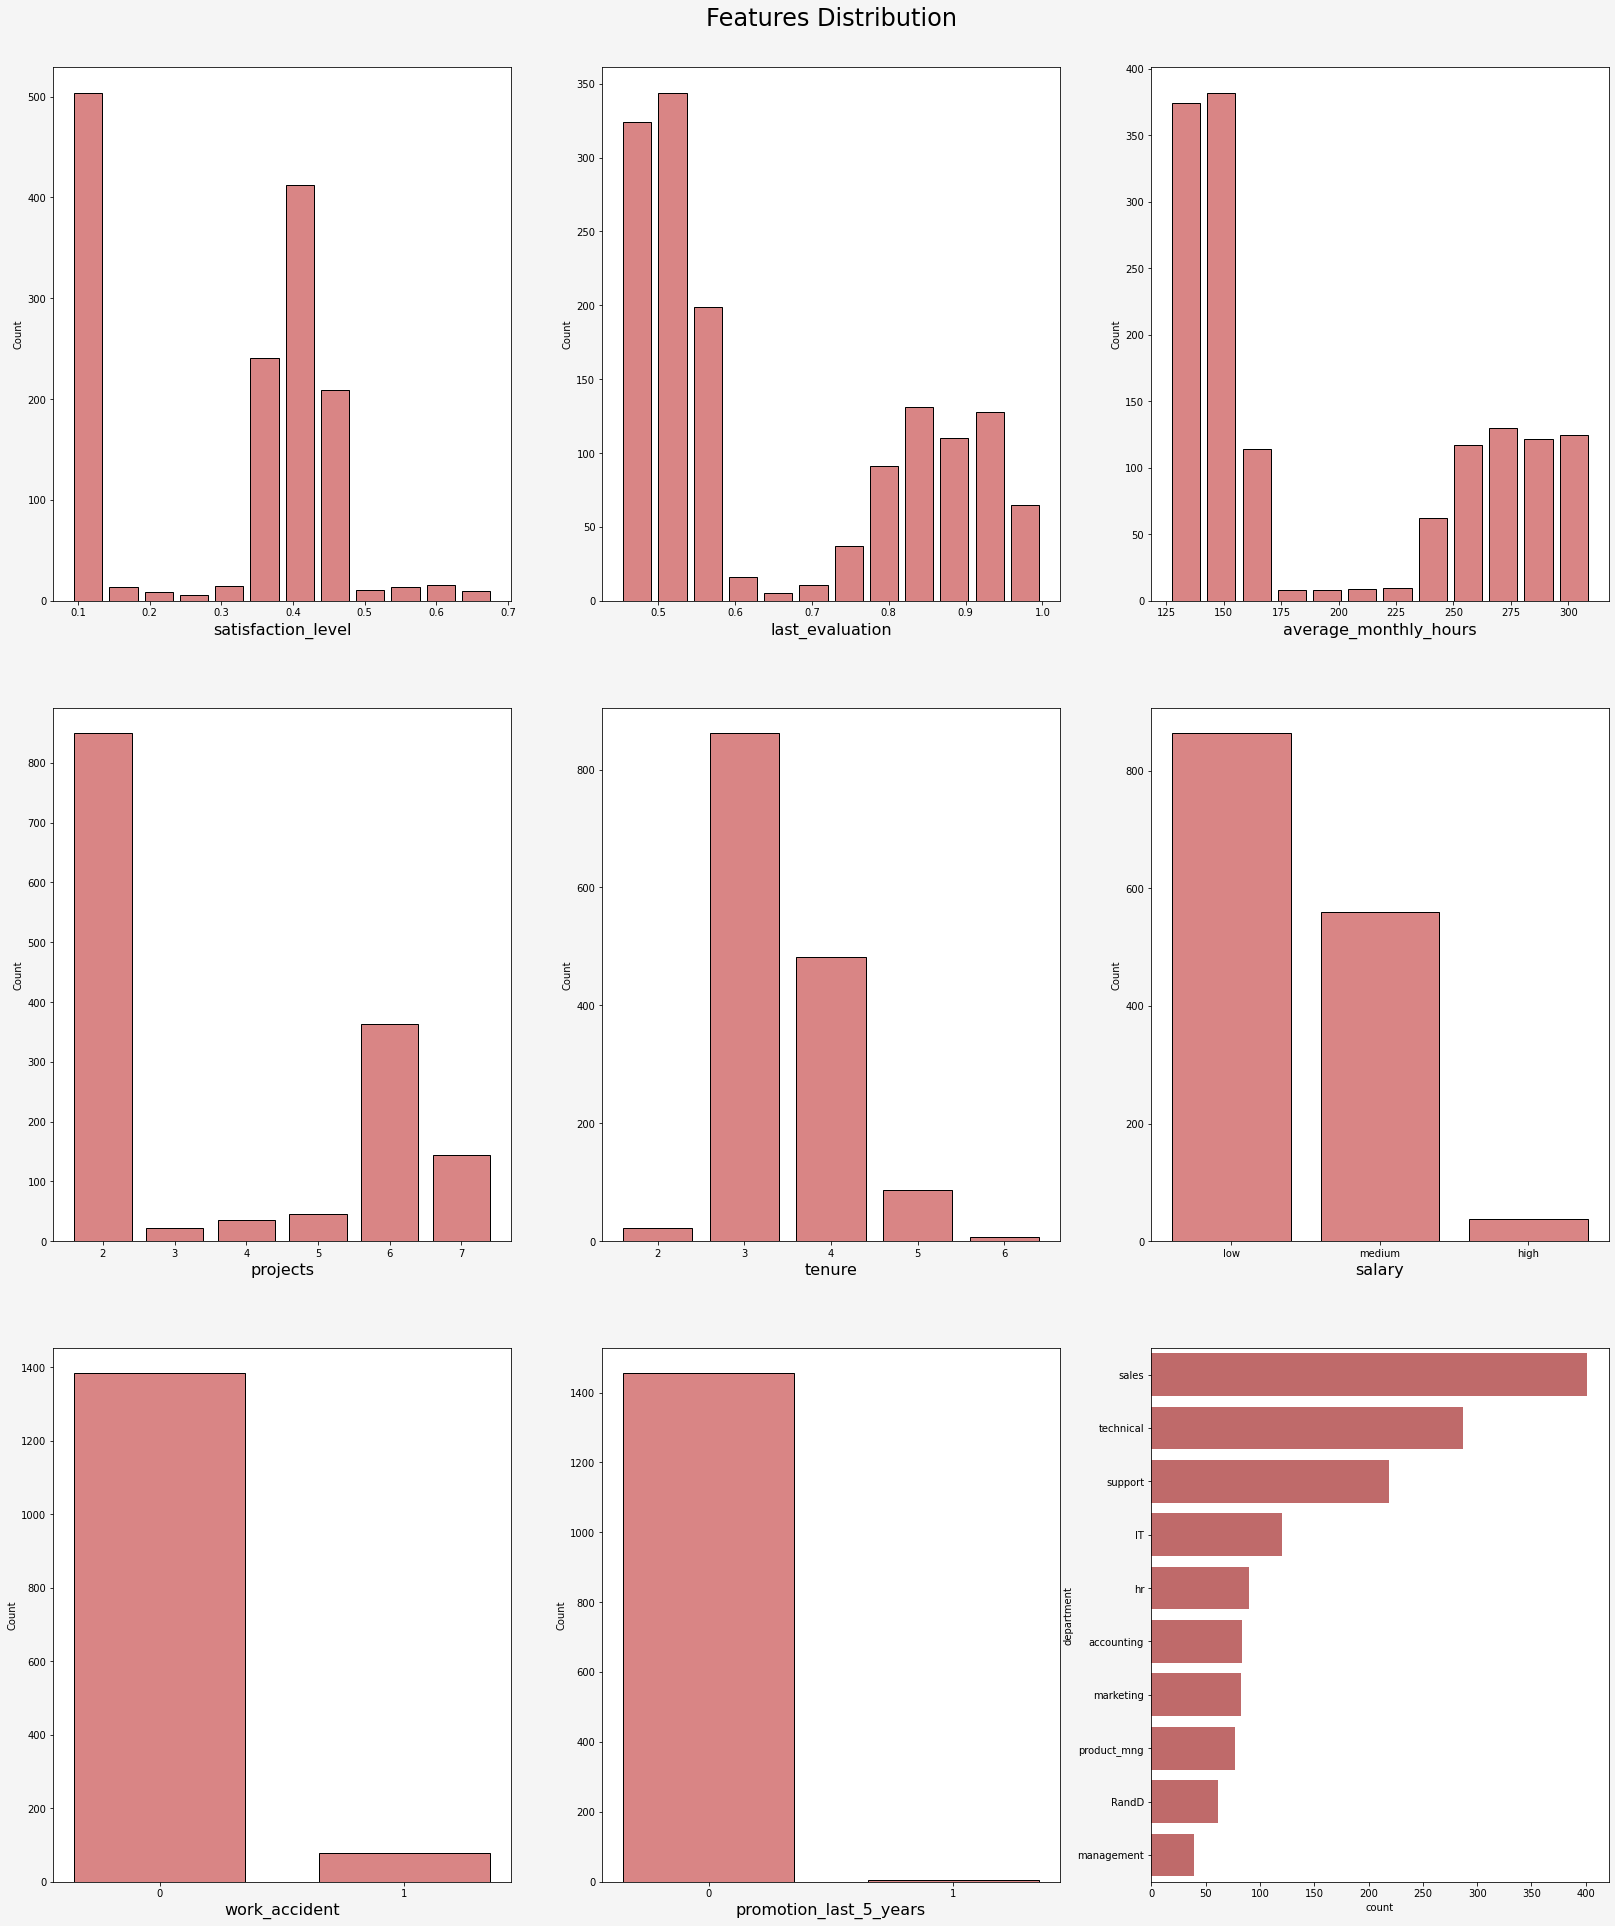

In [36]:
non_sat_left = lefties.loc[lefties['satisfaction_level']< 0.7]

print("Figure 10")

fig, axs = plt.subplots(3, 3, figsize=(24, 28), facecolor='whitesmoke')
plt.subplots_adjust(top=0.95, left=0.05, right=0.95, bottom=0.05)

general_viz(non_sat_left, continuous, discrete, binomial, axs)

# Plot department
category_counts = non_sat_left['department'].value_counts()
ordered_categories = category_counts.index
sns.countplot(data=non_sat_left, y='department', order=ordered_categories,
             color="indianred", ax=axs[2, 2])
# Add a common title
fig.suptitle("Features Distribution", fontsize=24)

plt.show()

- There are some differences with the workers with a satisfaction_level greater than 0.7
- The last_evaluation variable is, in general, lower than 0.7. This seems to point to workers whith worst califications for their work
- The average monthly hours shows that this staff members is lesser than for the previous groups, showing a concentration of less than 175 hours.
- Something similar surges from the number of projects these employees are involved in. The majority seems to work in two projects, and another relevant number in six projects.
- They have a tenure, in most cases, of 3 or 4 years; with low and medium level of salaries.
- The work_accident, promotion_las_5_years and department variables doesn't show, in principle, relevant differences with the patterns for the whole dataset, and the more satisfied_level workers.

## Analysis of *tenure*

The heatmap of figure 4 shows that the *tenure* column have a slightly positive correlation (0.17) with the target *left*. In the previous analysis of *satisfaction_level* we already got some information about the posible relation between *satisfaction_level*, *tenure*, and the decision to leave the company.
In this section, the accent will be put on investigating how the time spended in the company, could have some incidence in the departure of employees.
First, we start by plotting the *tenure* variable with the target *left*.  

Figure 11


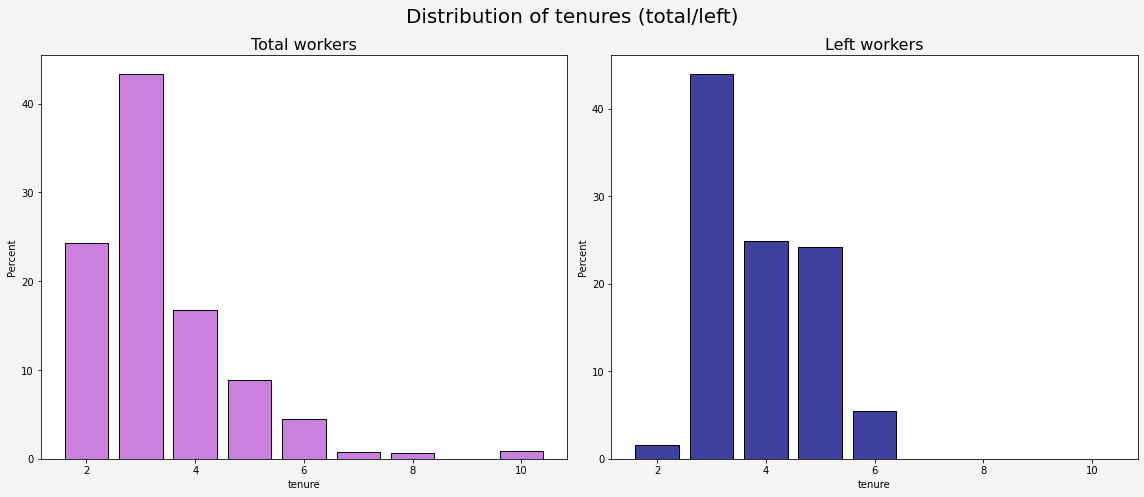

In [37]:
# Tenure and decision to leave
print("Figure 11")
fig, axs = plt.subplots(1,2, figsize=(16,7), facecolor='whitesmoke')

#Histogram for the distribution of tenures for the entire data frame (df1)
sns.histplot(data=df1, x='tenure', color='mediumorchid',
             stat='percent', shrink=0.8, bins=10, binrange=(2,10), discrete=True, ax=axs[0])
axs[0].set_title('Total workers', fontsize=16)

#Histogram for the tenures of the workers who left the company (dataframe: lefties)
sns.histplot(data=lefties, x='tenure', shrink=0.8, color='navy',
             stat='percent', bins=10, binrange=(2,10), discrete=True, ax=axs[1])
axs[1].set_title('Left workers', fontsize=16)
fig.suptitle('Distribution of tenures (total/left)', fontsize=20)
fig.tight_layout()
plt.show()

Distribution of the workers that left by tenure

In [38]:
lefties['tenure'].value_counts(normalize=True, sort=True)

tenure
3    0.438975
4    0.248619
5    0.242089
6    0.054746
2    0.015570
Name: proportion, dtype: float64

In [39]:
df1['tenure'].value_counts(normalize=True, sort=True)

tenure
3     0.432825
2     0.242682
4     0.167209
5     0.088566
6     0.045201
10    0.008923
7     0.007839
8     0.006755
Name: proportion, dtype: float64

Figure 12


<Figure size 1152x864 with 0 Axes>

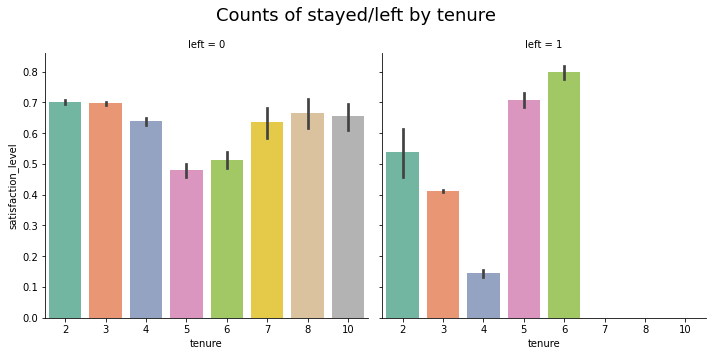

In [40]:
#Tenure, satisfaction levels and left
print("Figure 12")
plt.figure(figsize=(16,12),facecolor='whitesmoke')
sns.catplot(data=df1, kind='bar',
            x='tenure', y='satisfaction_level', col='left', palette='Set2')
plt.suptitle('Counts of stayed/left by tenure', fontsize=18)
plt.tight_layout()
plt.show()

Figure 13


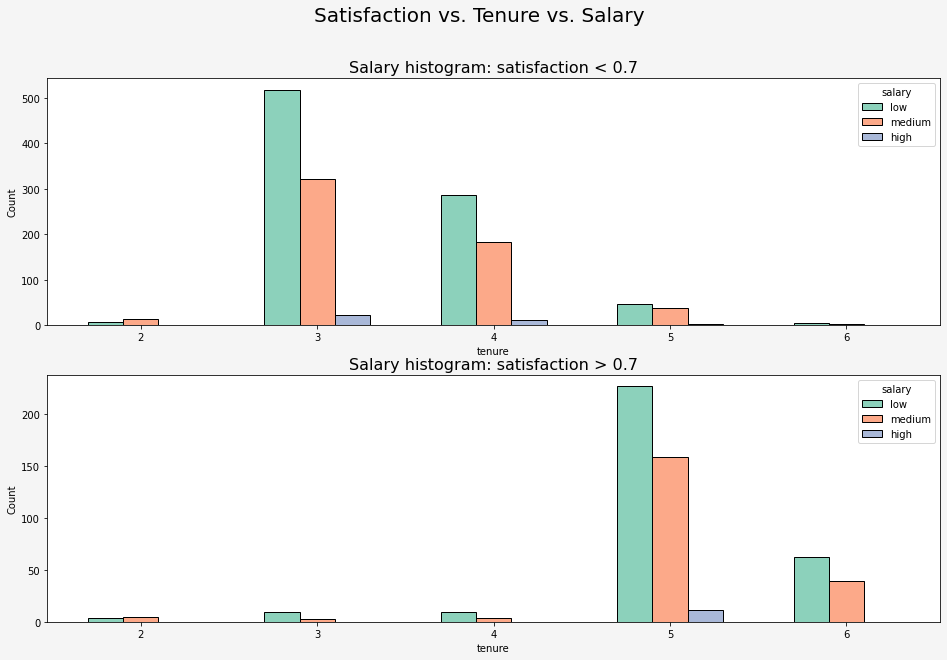

In [41]:
#satisfaction_level vs. tenure vs. salary
print("Figure 13")
fig, axs = plt.subplots(2,1, figsize=(16,10), facecolor='whitesmoke')

sns.histplot(data=non_sat_left,
               x='tenure', hue='salary', discrete=True,
                hue_order = ['low', 'medium', 'high'], multiple='dodge', shrink=0.6, palette='Set2',ax=axs[0])
axs[0].set_title('Salary histogram: satisfaction < 0.7', fontsize=16)

sns.histplot(data=satif_left,
               x='tenure', hue='salary', discrete=True,
                hue_order = ['low', 'medium', 'high'], multiple='dodge', shrink=0.6, palette='Set2',ax=axs[1])
axs[1].set_title('Salary histogram: satisfaction > 0.7', fontsize=16)
plt.suptitle(("Satisfaction vs. Tenure vs. Salary"), fontsize=20)
plt.show()

##### **Some conclusions about *tenure***

- There are no *left* employees neither with less than 2 or more than 6 years of tenure. No *new* neither *old* employees leaves the company.
- As sated for the *satisfaction_level* analysis, the employees that left with four or less years of tenure, who left, reported low levels of satisfaction, and with five or six years of tenure were more satisfied.
- The level of salaries, combined with the tenure and the lack of mobility (promotions), seems to have incidence as a factor for leaving the company
- Overall, there seems to be a link between satisfaction levels, hours worked, number of projects, the promotions over the last five years and the decision to leave.

## Employees departures by department

A visualization of the distribution of the employees who left the company by department

Figure 14


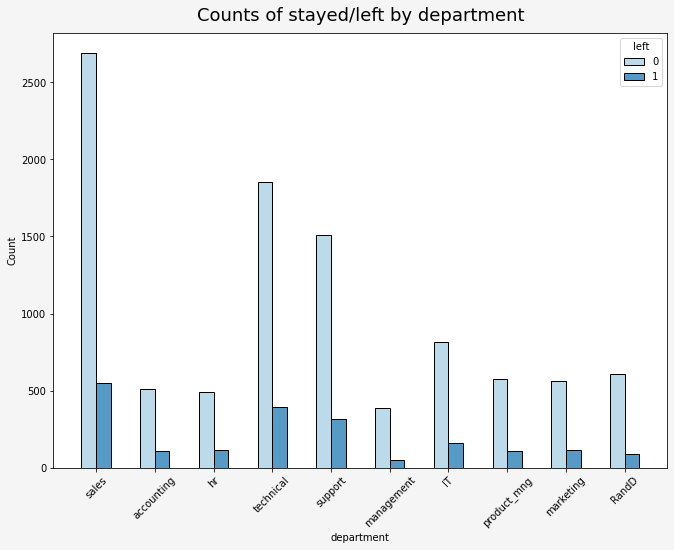

In [42]:
# Stacked histogram to compare department distribution of employees who left to that of employees who didn't
print("Figure 14")
plt.figure(figsize=(11,8), facecolor='whitesmoke')
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5, palette='Paired')
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=18, pad=12)
plt.show()

In [43]:
lefties['department'].value_counts(normalize=True)

department
sales          0.276243
technical      0.195881
support        0.156705
IT             0.079357
hr             0.056755
marketing      0.056253
product_mng    0.055249
accounting     0.054746
RandD          0.042692
management     0.026118
Name: proportion, dtype: float64

In [44]:
df1['department'].value_counts(normalize=True)

department
sales          0.270119
technical      0.187140
support        0.151864
IT             0.081394
RandD          0.057877
product_mng    0.057210
marketing      0.056125
accounting     0.051789
hr             0.050121
management     0.036361
Name: proportion, dtype: float64

## Number of projects and the decision to leave

This section analyses the possible relations between the number of projects that a worker is involved in, and the decision to leave the company

Figure 15


Text(0.5, 1.0, 'Count of left vs. stayed by satisfaction level')

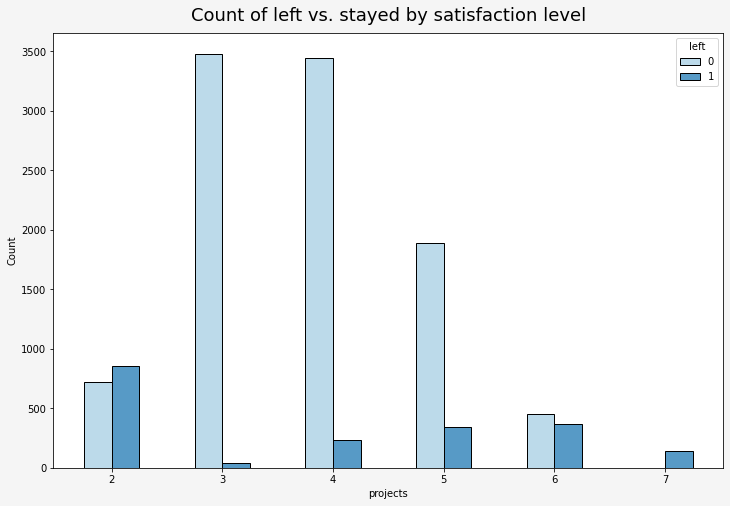

In [45]:
# Number of projects and left
print("Figure 15")
plt.figure(figsize=(12,8), facecolor="whitesmoke")
sns.histplot(data=df1, x='projects', hue='left', shrink=0.5, multiple='dodge', discrete=1, palette='Paired')
plt.title("Count of left vs. stayed by satisfaction level", fontsize=18, pad=12)

In [46]:
df1.groupby('projects')['left'].value_counts(sort=False)

projects  left
2         0        725
          1        857
3         0       3482
          1         38
4         0       3448
          1        237
5         0       1890
          1        343
6         0        455
          1        371
7         1        145
Name: count, dtype: int64

Some insights come along from the previous visualization. The more projects a worker is involved in, the more he is prone to leave the company:
- There number of workers who left, and were involved in two projects is greater than those who stayed.
- The proportion is increasing, and for case of seven projects, all the workers left.
- This is consistent with the previous results: more hours of work, more projects, less mobility, results in a tendency to leave the company

## Insights

- There is a relation between the satisfaction level and the decision to leave, in two aspects: employees with low satisfaction levels tends to leave more, but also there's a portion of employees with high satisfaction levels that leaves the company, and they represent about a third of the total leaving workers.
- The quantity of hours worked by month, the number of projects the workers are involved in, the lack of promotions, and the salary level seems to influence the decision to leave.
- The company should address these variables, contemplating deep modifications in the structures of the relations with it workers

## **4. Model Building**

The requirement is to predict whether an employee leaves the company, which is a categorical outcome variabl, a task that involves classification. More specifically, this involves binary classification, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn't leave). 

The models that are able to develop this kind of classification are Logistic Regression or a Tree-based Machine Learning model. In this case, a Logistic Regression model is created.

### Model: Logistic Regression

#### Encoding of non-numerical variables

The variables `department`and `salary` should be encoded as numerical. `department` is transformed using dummies and `salary` (ordinal) is transformed in a hierachy from 0-2.

In [47]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


Now, since outliers can affect the perfomance of the model, they are removed from the dataframe

In [48]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= (q1 - 1.5*IQR)) & (df_enc['tenure'] <= (q3 + 1.5*IQR))]
# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


The next step is the implementation of the Logistic Regression model

Coefficient:  [[-4.34038932e+00 -4.34253772e-02 -4.86224421e-01  3.82915687e-03
   1.10423739e+00 -1.47674475e+00 -1.04069509e+00 -5.60512034e-01
  -9.03297187e-02 -3.15630821e-01 -2.53811588e-01  9.44885057e-03
  -2.00963606e-01 -9.62413314e-02 -2.01615062e-01  2.96386834e-02
   2.57193600e-02  2.04695413e-02]]
Intercept:  [-1.33575617]


<AxesSubplot:xlabel='satisfaction_level', ylabel='left'>

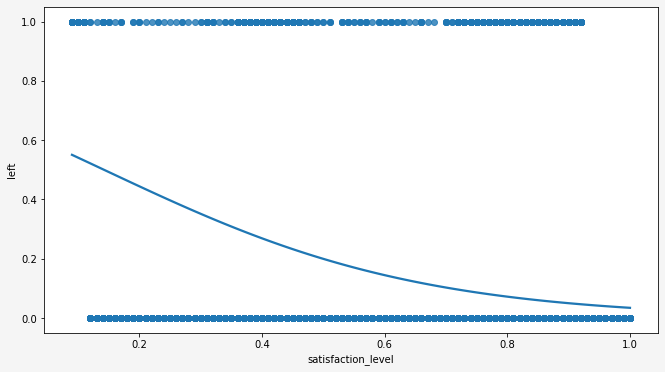

In [49]:
# Create the predictor and labels from the dataset
# X = satisfaction_level (negative correlation with the target)
# y = left (already dtype int)

X = df_logreg.drop('left', axis=1)
y = df_logreg['left']

# Split a train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Instantiate the model and fit with the data
logreg = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

# Coefficient and intercept
print('Coefficient: ', logreg.coef_)
print('Intercept: ', logreg.intercept_)

# Visualization
plt.figure(figsize=(11,6), facecolor="whitesmoke")
sns.regplot(x="satisfaction_level", y="left", data=df1, logistic=True, ci=None)

Predicted probabilities:
 [[0.61359659 0.38640341]
 [0.81975432 0.18024568]
 [0.57573756 0.42426244]
 ...
 [0.53906398 0.46093602]
 [0.73218373 0.26781627]
 [0.47789669 0.52210331]]

Metrics
-------
Accuracy: 0.823933
Precision: 0.460815
Recall: 0.260177
F1 Score: 0.332579
                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2786
    Predicted would leave       0.46      0.26      0.33       565

                 accuracy                           0.82      3351
                macro avg       0.66      0.60      0.62      3351
             weighted avg       0.79      0.82      0.80      3351



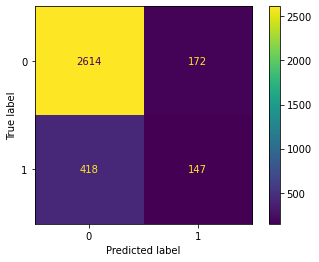

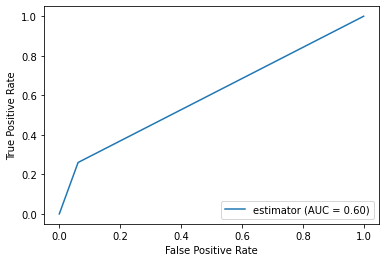

In [50]:
# Predictions
y_pred = logreg.predict(X_test)
print("Predicted probabilities:\n", logreg.predict_proba(X_test))

# Evaluation
print('\nMetrics')
print('-------')
print('Accuracy: ' '%6f' % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

# Confussion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = logreg.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = logreg.classes_)
disp.plot()

target_names = ['Predicted would not leave', 'Predicted would leave']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

#ROC AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='estimator')
display.plot()

### Summary of model results

The logistic regression model achieved precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%, on the test set.

## **5. Conclusion, Recommendations, Next Steps**

- The Logistic Regression model have a good performance predicting the employees that won't leave, but a poor performance with the target category of leaving employees.
- The model could be improved, by feature engineering, and combining different types of hyperparameters.
- Another alternative could be to implement another classification model, such as decision-trees based models.

The analysis of the data showed these salient conclusions:

- There's a relation between employee satisfaction, promotions, califications, the quantity of hours worked and the number of project, that clearly influence the employee decision to leave.
- The first years of the work relationship are the keys in the employee retention. After 5 years of tenure the employees are less likely to leave.
- Reviewing the company politics for the firsts years related to promotions, evaluations, and prospect careers in the company, can help address the problem
- Addressing the load of work (hours, project) could help improve the employee retention.
- The criteria and times of evaluations and promotions should also be revised
- Overall employee satisfaction rate is a key factor that is a consequence of the aspects previously addressed